In [2]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

In [3]:
import xml.etree.ElementTree as ET
from lxml import etree
import pandas as pd

xml_data = '/path/user_agents.xml'

def xml2df(xml_data):
    tree = ET.parse(xml_data)
    root = tree.getroot()
    all_records = []
    headers = []
    for i, child in enumerate(root):
        record = []
        for subchild in child:
            record.append(subchild.text)
            if subchild.tag not in headers:
                headers.append(subchild.tag)
        all_records.append(record)
    return pd.DataFrame(all_records, columns=headers)

In [4]:
from xml.dom import minidom
import numpy as np
import pylab as pl
import re, fileinput
import os.path

# Input data
movieNames = ['After_The_Rain','Attitude_Matters','Barely_legal_stories','Between_Viewings','Big_Buck_Bunny','Chatter','Cloudland','Damaged_Kung_Fu','Decay','Elephant_s_Dream','First_Bite','Full_Service','Islands','Lesson_Learned','Norm','Nuclear_Family','On_time','Origami','Parafundit','Payload','Riding_The_Rails','Sintel','Spaceman','Superhero','Tears_of_Steel','The_room_of_franz_kafka','The_secret_number','To_Claire_From_Sonny','Wanted','You_Again']

pathfeatures  = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Discrete/features/"
pathlabels = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/MediaEval/annotations-org/"
pathrank = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Discrete/annotations/"
pathlist = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Continuous/"

pathcontinuous = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/ContinuousLIRIS-ACCEDE/"
pathcontfeatures = "/home/yt/Desktop/cvpr2014/repro/mediaeval/data/dataset/Continuous/features-out/"

#ranksFile = '..\\annotations\\ACCEDEranking.txt'
databaseFilesXML = pathlist + 'ACCEDEdescription.xml'
movieFilesXML = pathlist + 'ACCEDEmovies.xml'
continuousAnnotationsFolder = pathcontinuous +'continuous-annotations/'
med2017annotationsFolder = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Valence_Arousal-annotations/MEDIAEVAL17-DevSet-Valence_Arousal-annotations/annotations/'
med2017fearFolder = '/home/yt/Desktop/mediaeval2017/MEDIAEVAL17-DevSet-Fear-annotations/MEDIAEVAL17-DevSet-Fear-annotations/annotations/'

databasefiles= xml2df(databaseFilesXML)
moviefiles = xml2df(movieFilesXML)


    # Read databaseFilesXML
databaseXMLdoc = minidom.parse(databaseFilesXML)
idsList = databaseXMLdoc.getElementsByTagName('id')
movieFileList = databaseXMLdoc.getElementsByTagName('movie')
startFrameList = databaseXMLdoc.getElementsByTagName('start')
endFrameList = databaseXMLdoc.getElementsByTagName('end')
        
    # Read movieFilesXML
movieXMLdoc = minidom.parse(movieFilesXML)
moviesList = movieXMLdoc.getElementsByTagName('movie')
genresList = movieXMLdoc.getElementsByTagName('genre')
excerptsList = movieXMLdoc.getElementsByTagName('excerpts')
titleList = movieXMLdoc.getElementsByTagName('title')

animation = [ ['Big_Buck_Bunny',24],
                ['Elephant_s_Dream',24],
                ['Origami',24],
                ['Sintel',24]]

fpsMovie = [['After_The_Rain',23.976],
            ['Attitude_Matters',29.97],
            ['Barely_legal_stories',23.976],
            ['Between_Viewings',25],
            #['Big_Buck_Bunny',24],
            ['Chatter',24],
                ['Cloudland',25],
                ['Damaged_Kung_Fu',25],
                ['Decay',23.976],
                #['Elephant_s_Dream',24],
                ['First_Bite',25],
                ['Full_Service',29.97],
                ['Islands',23.976],
                ['Lesson_Learned',29.97],
                ['Norm',25],
                ['Nuclear_Family',23.976],
                ['On_time',30],
                #['Origami',24],
                ['Parafundit',24],
                ['Payload',25],
                ['Riding_The_Rails',23.976],
                #['Sintel',24],
                ['Spaceman',23.976],
                ['Superhero',29.97],
                ['Tears_of_Steel',24],
                ['The_room_of_franz_kafka',29.786],
                ['The_secret_number',23.976],
                ['To_Claire_From_Sonny',23.976],
                ['Wanted',25],
                ['You_Again',29.97]]

contmovies = pd.DataFrame(fpsMovie,columns=['name','fps'])
animovies = pd.DataFrame(animation,columns=['name','fps'])

In [5]:
def getAnnotationDf(movname,folder):
    filename = os.path.join(folder, movname + '-MEDIAEVAL2017-valence_arousal.txt')
    annotation = np.genfromtxt(filename, names=True, delimiter='\t', dtype=None)
    df = pd.DataFrame(annotation)
    return df

def getFearDf(movname,folder):
    filename = os.path.join(folder, movname + '-MEDIAEVAL2017-fear.txt')
    annotation = np.genfromtxt(filename, names=True, delimiter='\t', dtype=None)
    df = pd.DataFrame(annotation)
    return df

In [12]:
getFearDf('Big_Buck_Bunny',med2017fearFolder).head()

,Id,Time,Fear
0,0,0,0
1,1,5,0
2,2,10,0
3,3,15,0
4,4,20,0


In [6]:
getAnnotationDf('Big_Buck_Bunny',med2017annotationsFolder).head()

,Id,Time,MeanValence,MeanArousal
0,0,0,0.068617,-0.082473
1,1,5,0.107618,-0.116572
2,2,10,0.189917,-0.076415
3,3,15,0.294732,0.019456
4,4,20,0.393728,0.141223


In [7]:
x = getFearDf('Big_Buck_Bunny',med2017fearFolder)
list(x[x.Fear > 0]['Time'])
#df[df['coverage'] > 50]

[200, 205]

In [17]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data

def displayAV(moviename,df, feardf,col='b'):
    #plt.figure(figsize=(10,10))
    fig, ax = plt.subplots(figsize=(10,10))

    for i in range(len(df)):
        xy = (df.MeanValence[i], df.MeanArousal[i])
        ax.plot(xy[0], xy[1], "ob")
        # Annotate the 1st position with another text box ('Test')
        offsetbox = TextArea(str(df.Time[i]), minimumdescent=False)

        ab = AnnotationBbox(offsetbox, xy,
                        xybox=(-20, 40),
                        xycoords='data',
                        boxcoords="offset points",
                        arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=90,rad=3")
                    )

        fearlist = list(feardf[ feardf.Fear > 0 ]['Time'])
        if (df.Time[i] in fearlist):
            ax.add_artist(ab)
        # Fix the display limits to see everything
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.grid()
    plt.xlabel('Valence')
    plt.ylabel('Arousal')
    plt.title(moviename)

    plt.show()


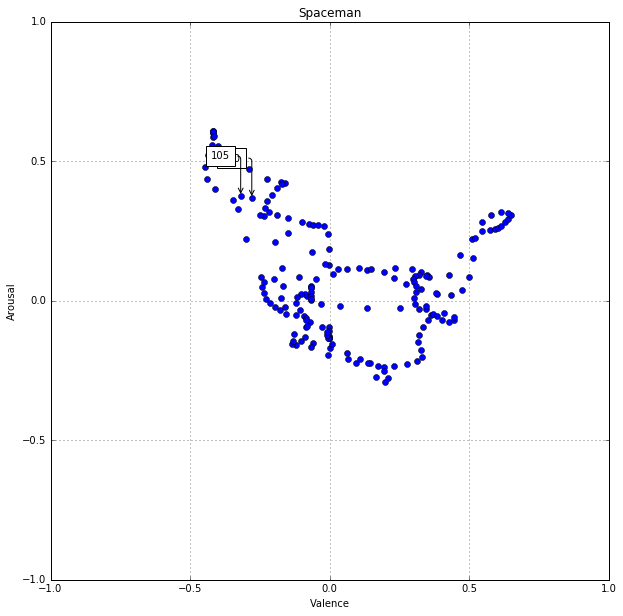

In [18]:
moviename= 'Spaceman'
displayAV(moviename,getAnnotationDf(moviename,med2017annotationsFolder),getFearDf(moviename,med2017fearFolder))

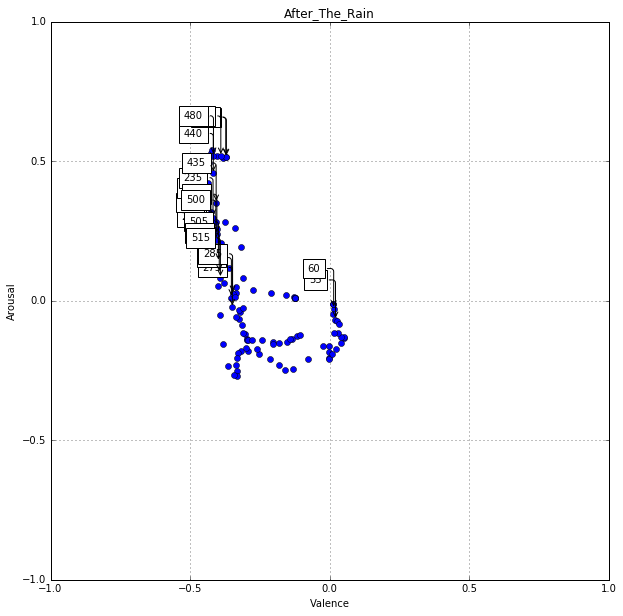

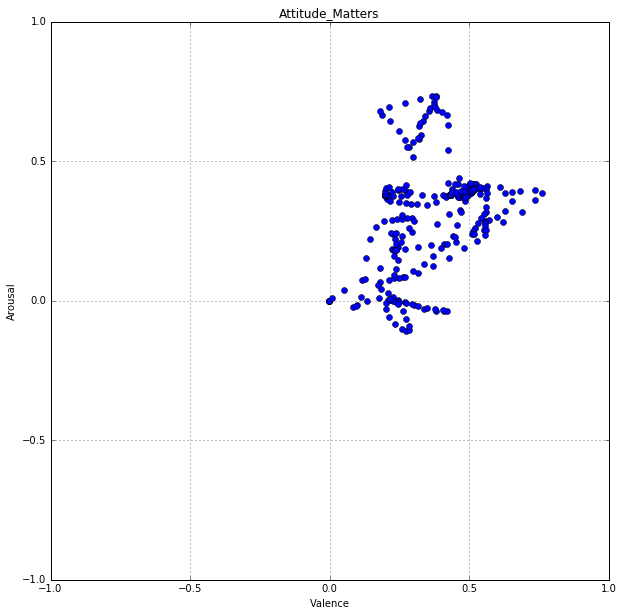

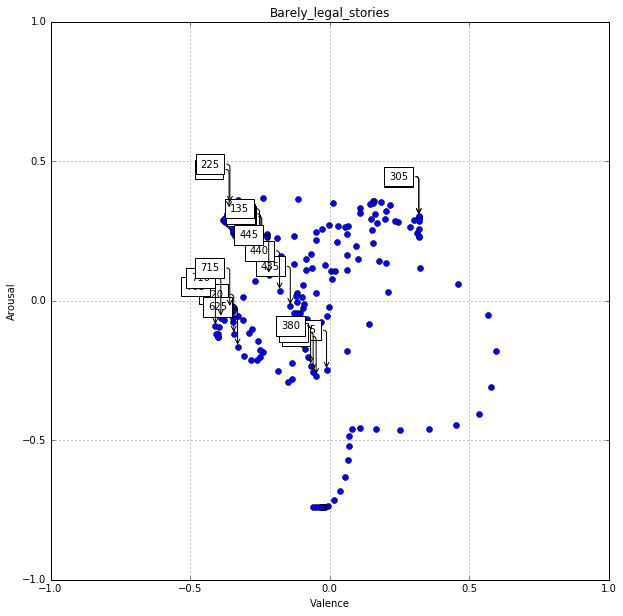

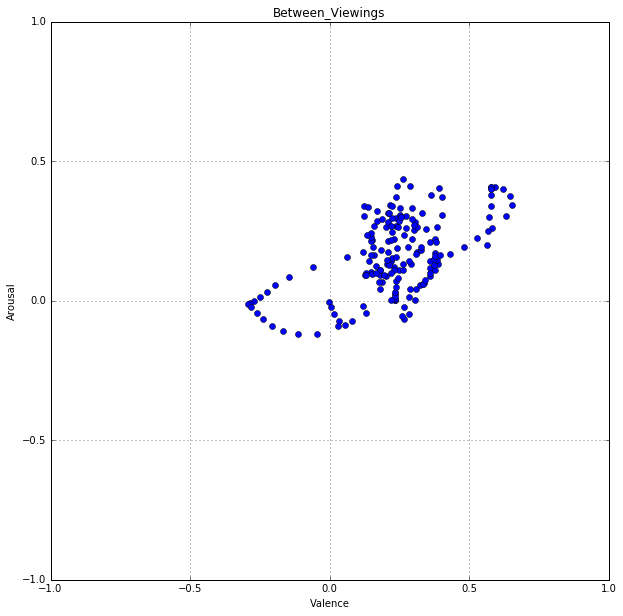

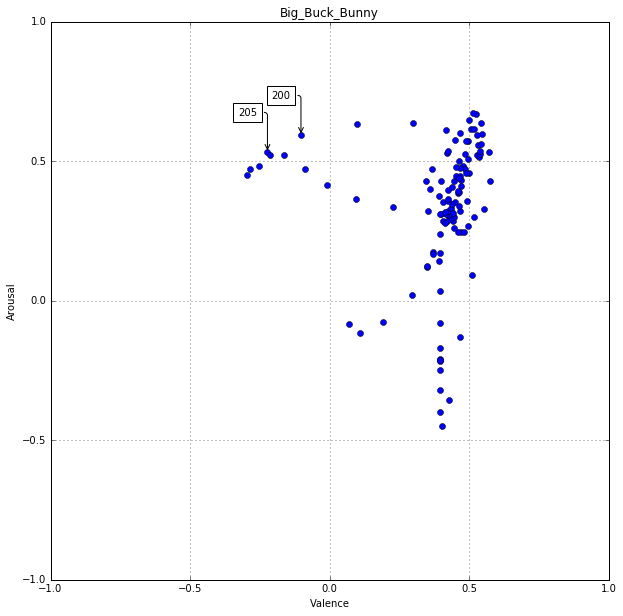

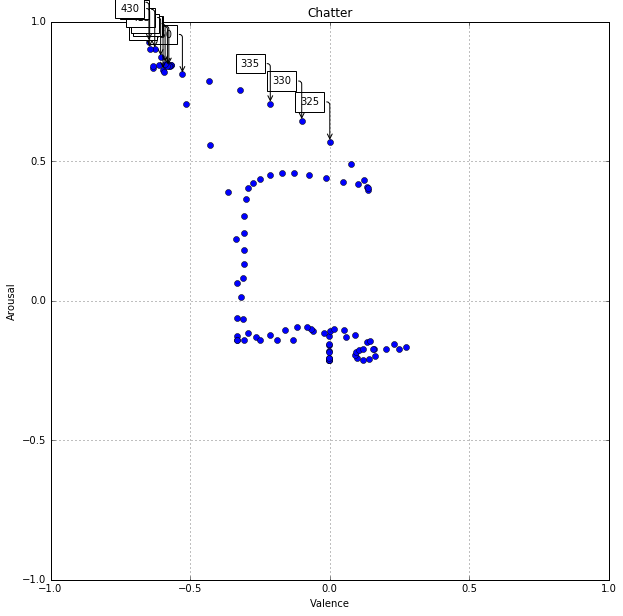

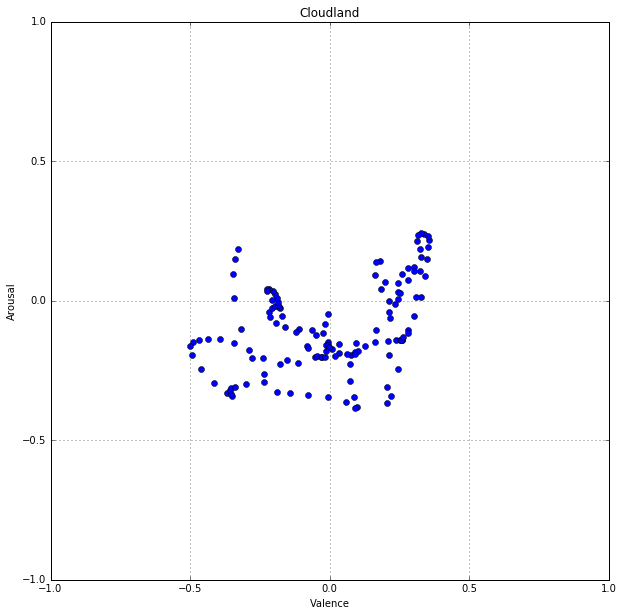

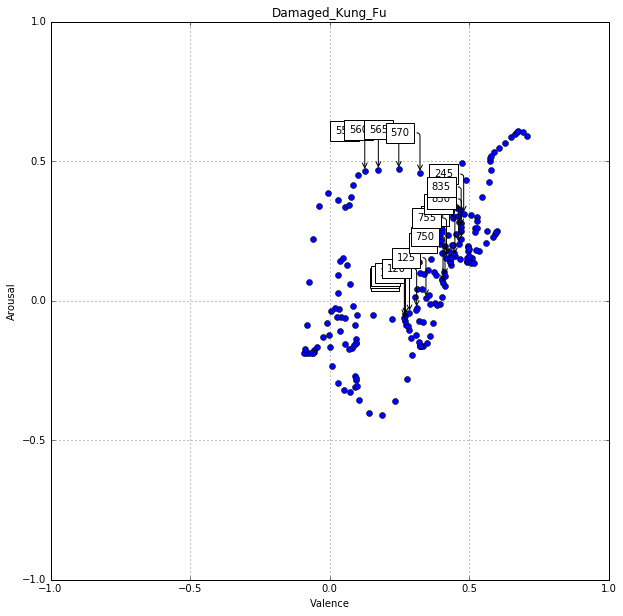

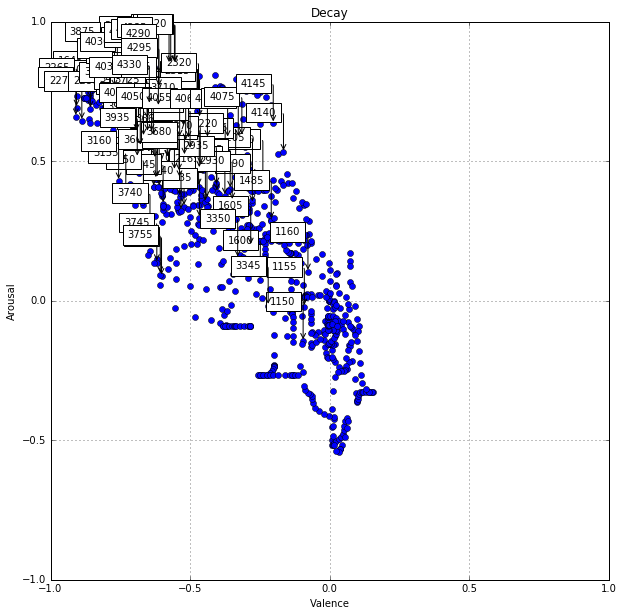

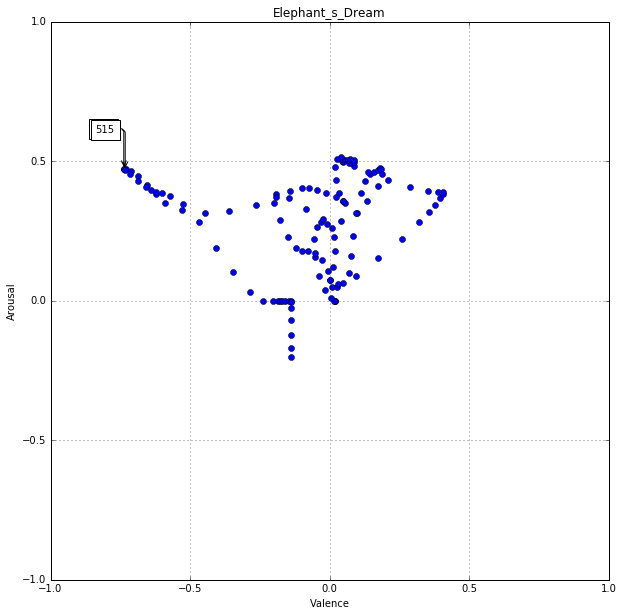

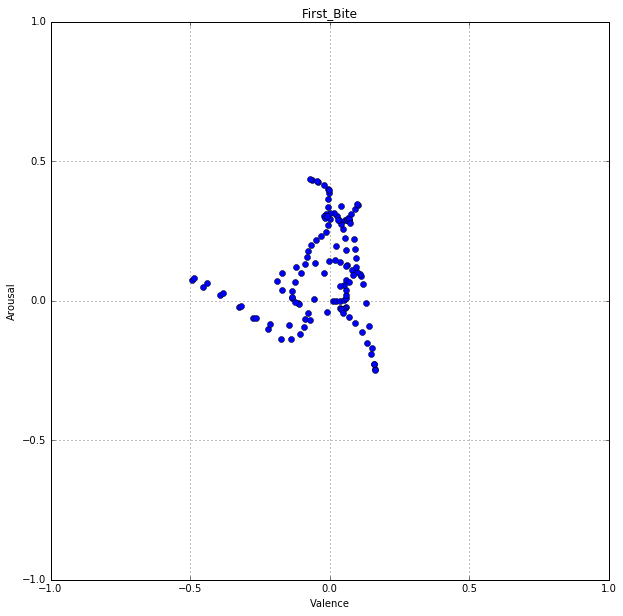

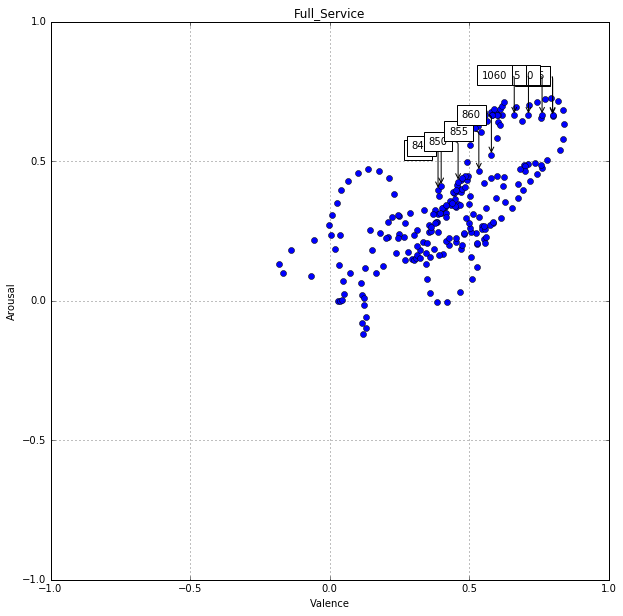

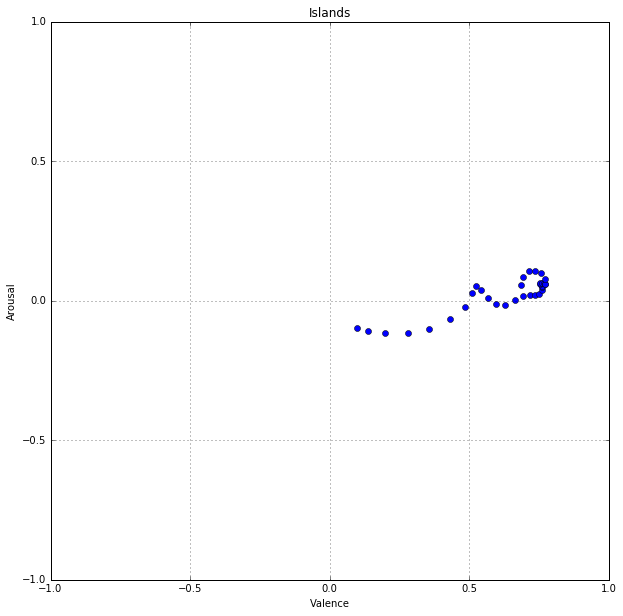

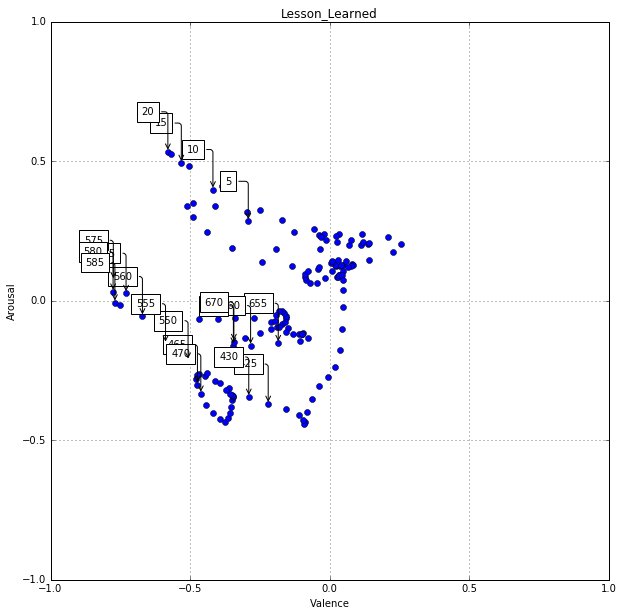

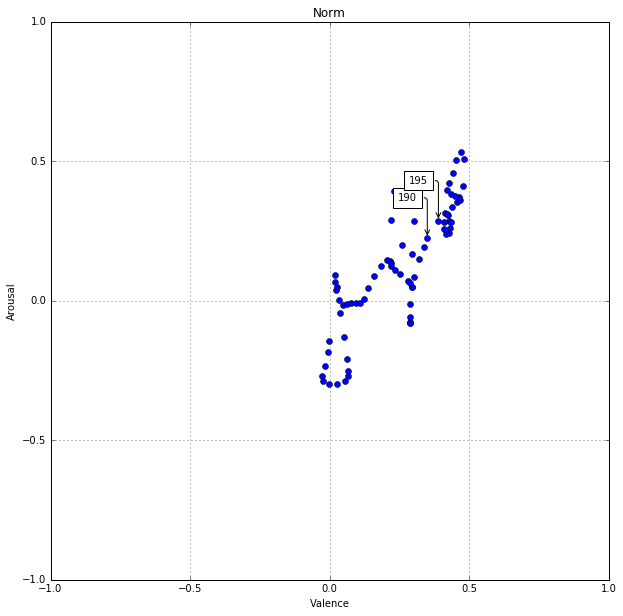

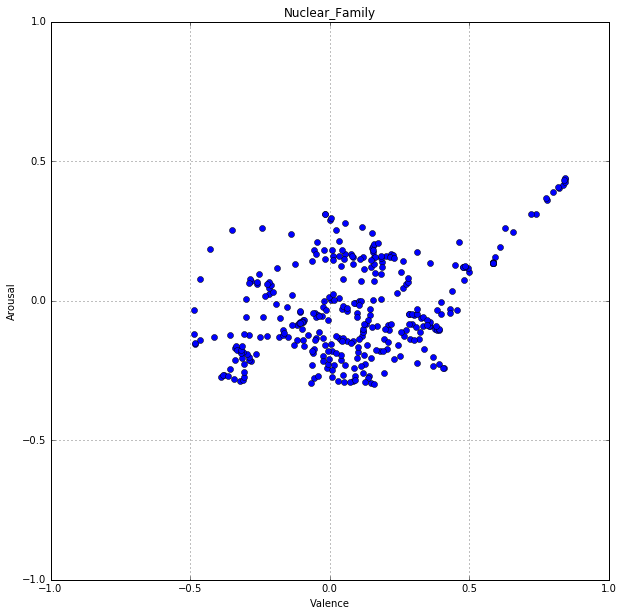

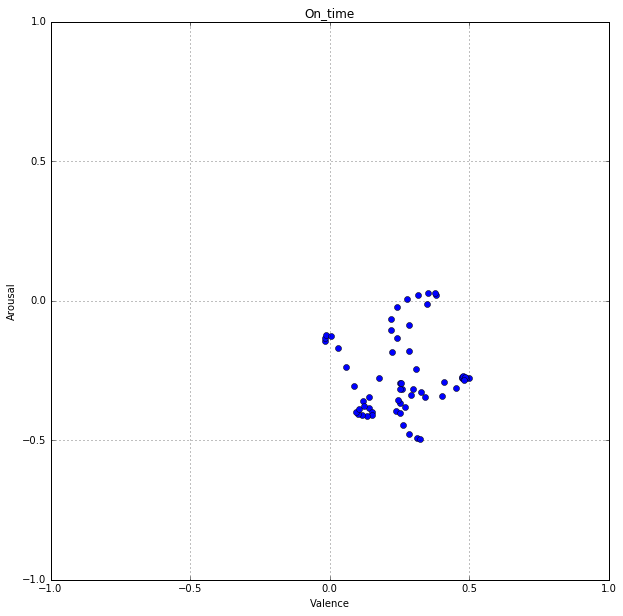

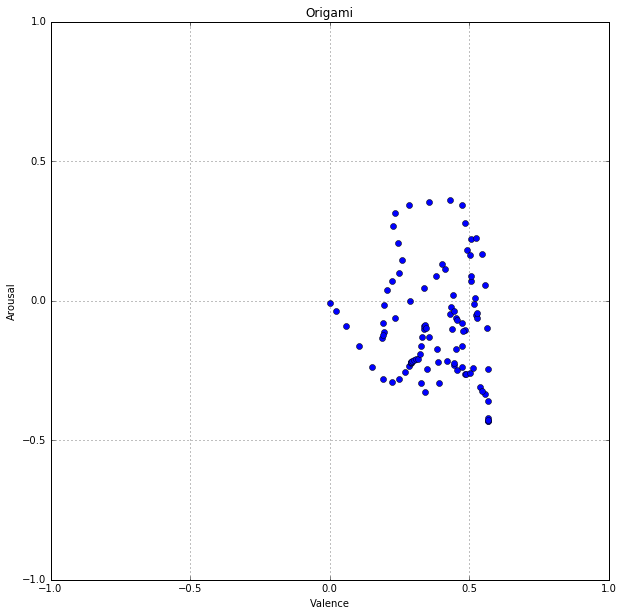

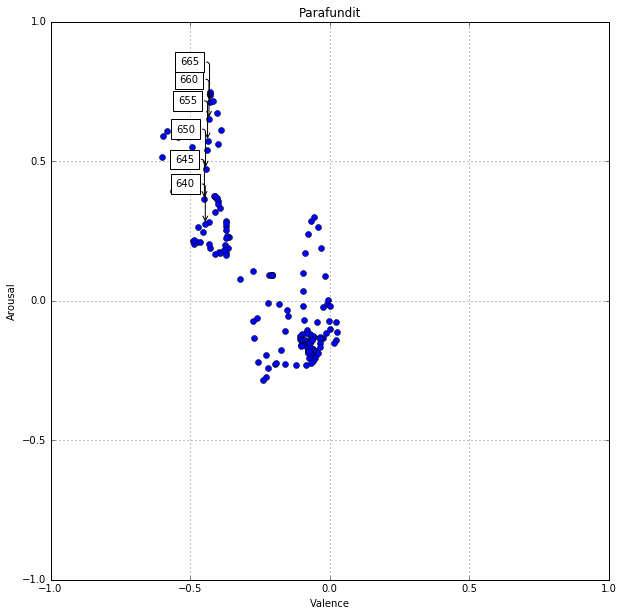

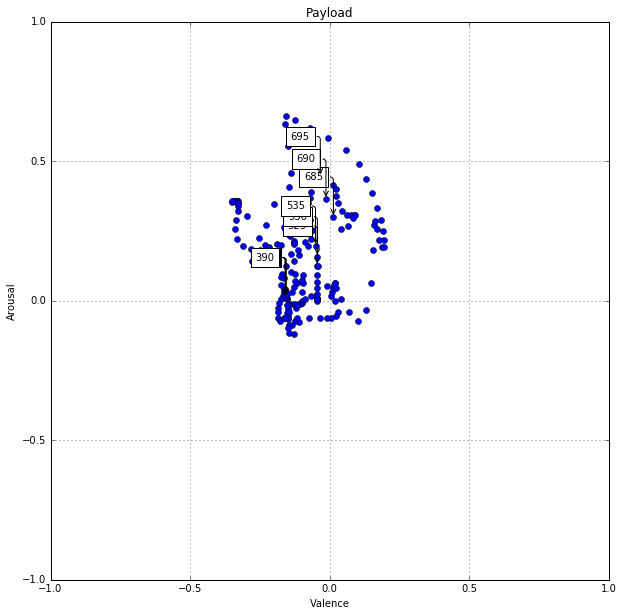

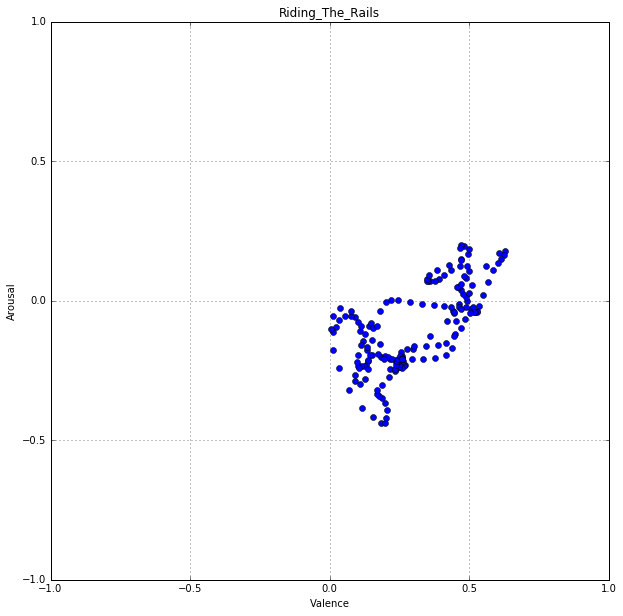

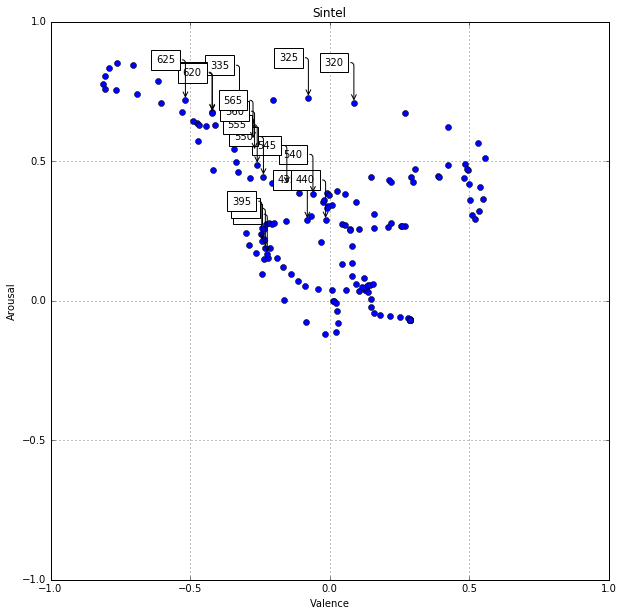

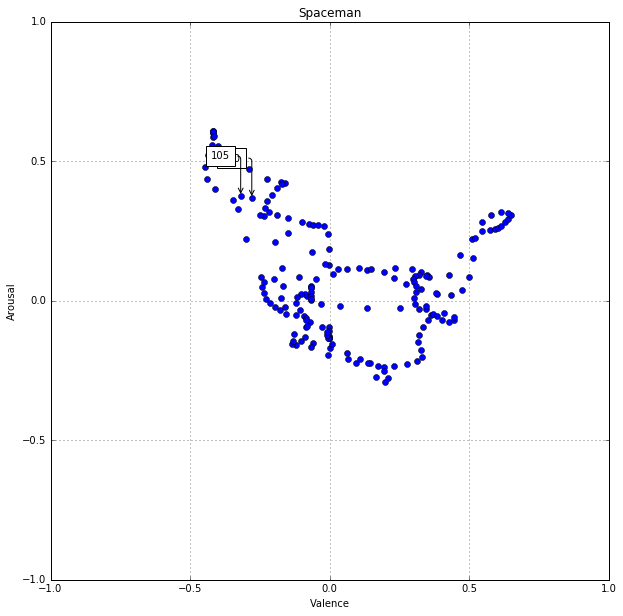

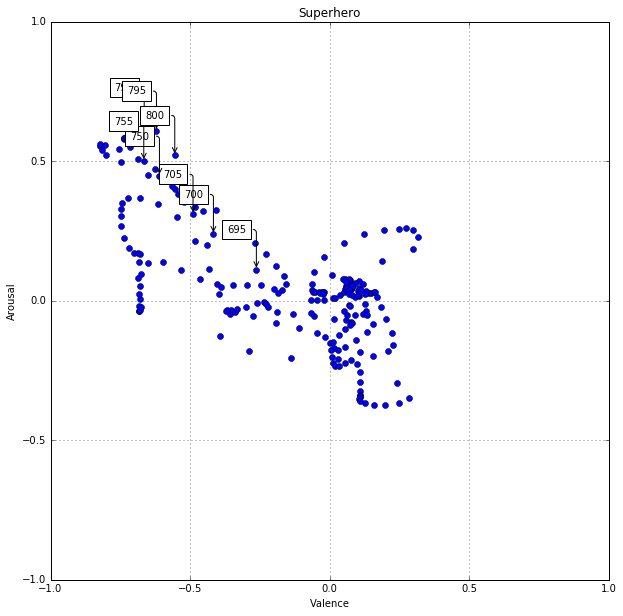

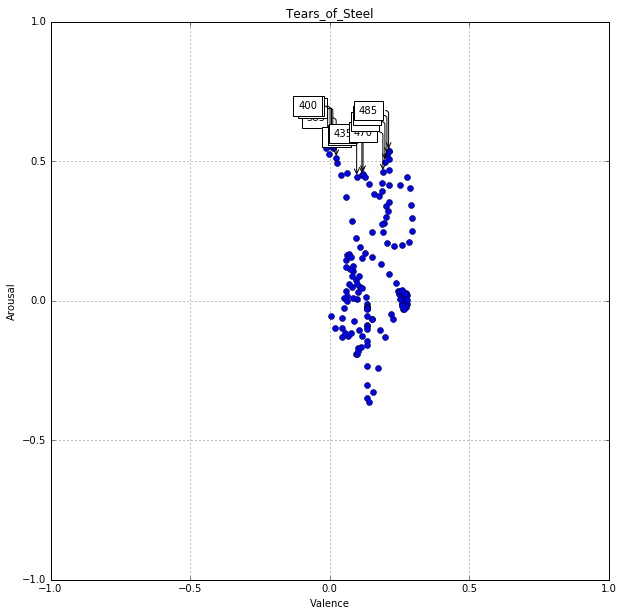

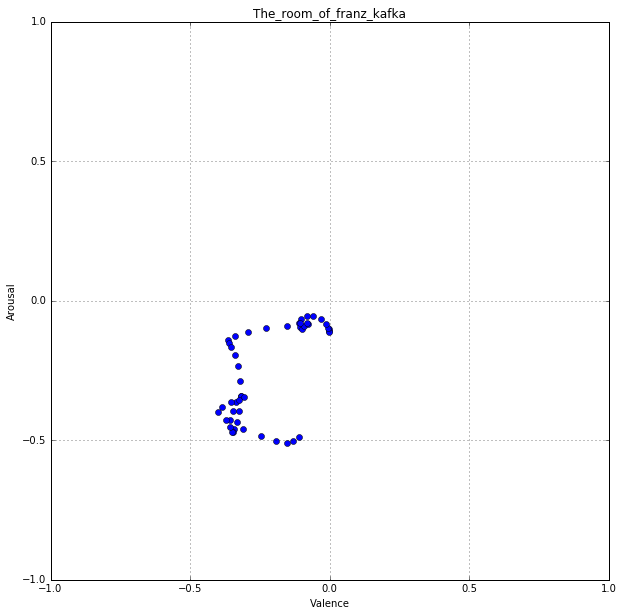

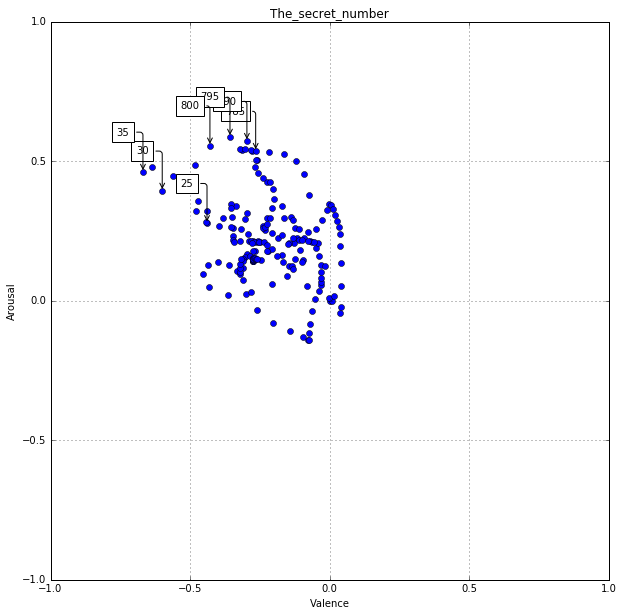

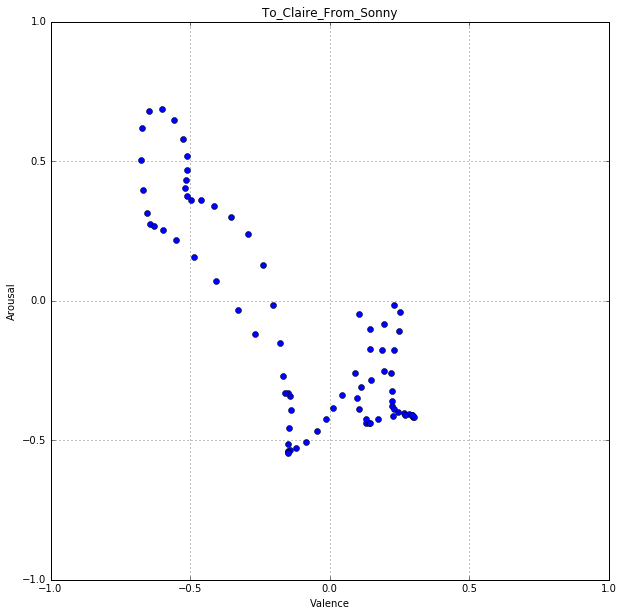

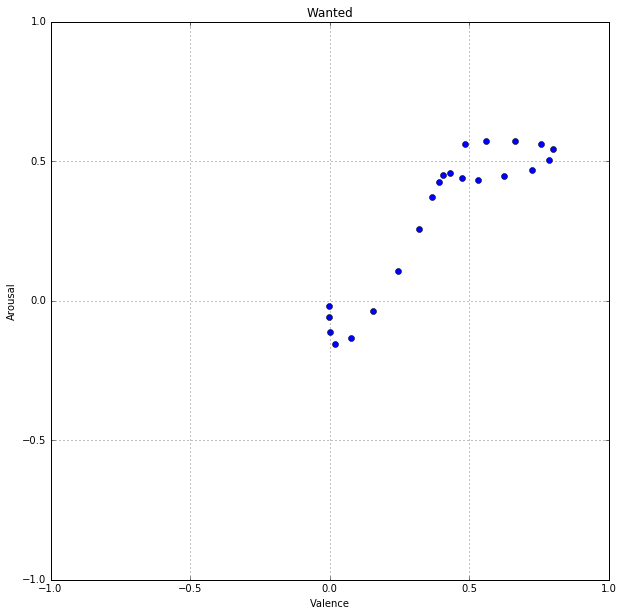

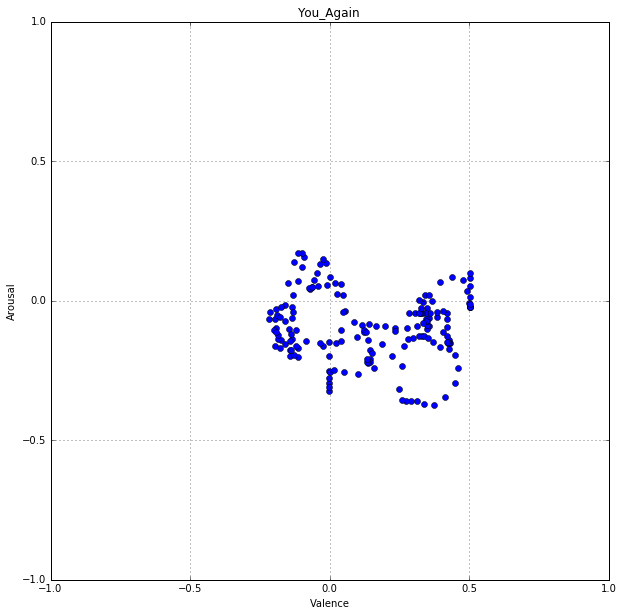

In [20]:
for moviename in movieNames:
    displayAV(moviename,getAnnotationDf(moviename,med2017annotationsFolder),getFearDf(moviename,med2017fearFolder))